# Loading and Inspecting Data

In [ ]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error

from housing_predictor.dataset import load_data
from housing_predictor.features import clean_data, engineer_features
from housing_predictor.modeling.train import train_linear_regression, train_random_forest
from housing_predictor.modeling.evaluate import evaluate_model

# Load data
train_df, test_df = load_data("../data/raw/train.csv", "../data/raw/test.csv")

# Inspect data
print("Train Dataset:")
display(train_df.head())

print("\nTest Dataset:")
display(test_df.head())

print("\nTrain Data Info:")
train_df.info()

print("\nTest Data Info:")
test_df.info()

print("\nMissing values in Train Data:")
print(train_df.isnull().sum())

print("\nMissing values in Test Data:")
print(test_df.isnull().sum())

print("\nTrain Dataset Statistics:")
display(train_df.describe())

print("\nTest Dataset Statistics:")
display(test_df.describe())

Train Dataset:


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0



Test Dataset:


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0



Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units 

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07



Test Dataset Statistics:


,beds,baths,size,lot_size,zip_code,price
count,505.000000,505.000000,505.000000,428.000000,505.000000,5.050000e+02
mean,2.954455,2.219802,1851.843564,3994.459813,98125.366337,9.795822e+05
std,1.214947,1.013404,922.556090,2696.962024,24.875054,6.084759e+05
min,1.000000,1.000000,376.000000,0.230000,98101.000000,1.700000e+05
25%,2.000000,1.500000,1171.000000,1326.500000,98108.000000,6.199900e+05
50%,3.000000,2.000000,1690.000000,4190.000000,98118.000000,8.400000e+05
75%,4.000000,2.500000,2400.000000,6000.000000,98126.000000,1.155000e+06
max,9.000000,7.000000,6139.000000,9974.000000,98199.000000,6.250000e+06


# Data Dictionary

| Column Name     | Data Type | Description                                             |
|-----------------|-----------|---------------------------------------------------------|
| beds            | Integer   | Number of bedrooms                                      |
| baths           | Float     | Number of bathrooms                                     |
| size            | Float     | Size of the property (numeric)                          |
| size_units      | String    | Units for property size (sqft)                          |
| lot_size        | Float     | Size of the lot (numeric)                               |
| lot_size_units  | String    | Units for lot size (sqft, acre)                         |
| zip_code        | Integer   | Zip code of property location                           |
| price           | Float     | Property price in USD (target variable for prediction)  |

# Data Cleaning and Preprocessing

In [3]:
train_df = clean_data(train_df)

# Feature Engineering

In [4]:
train_df = engineer_features(train_df)

# Data Visualization

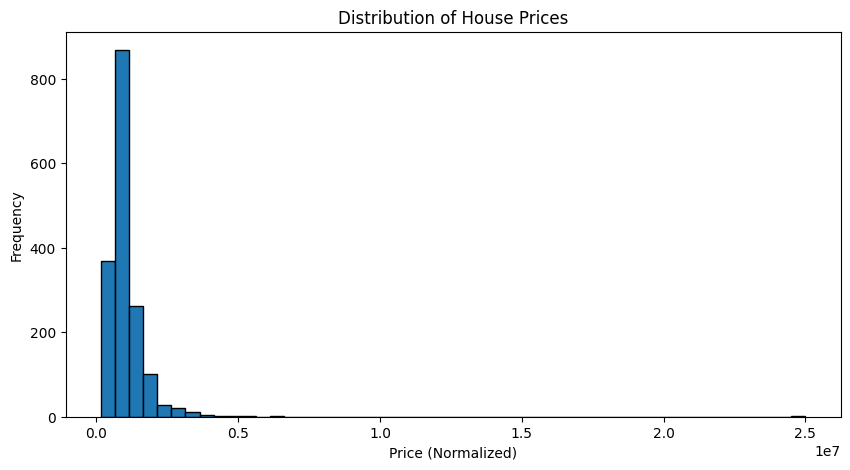

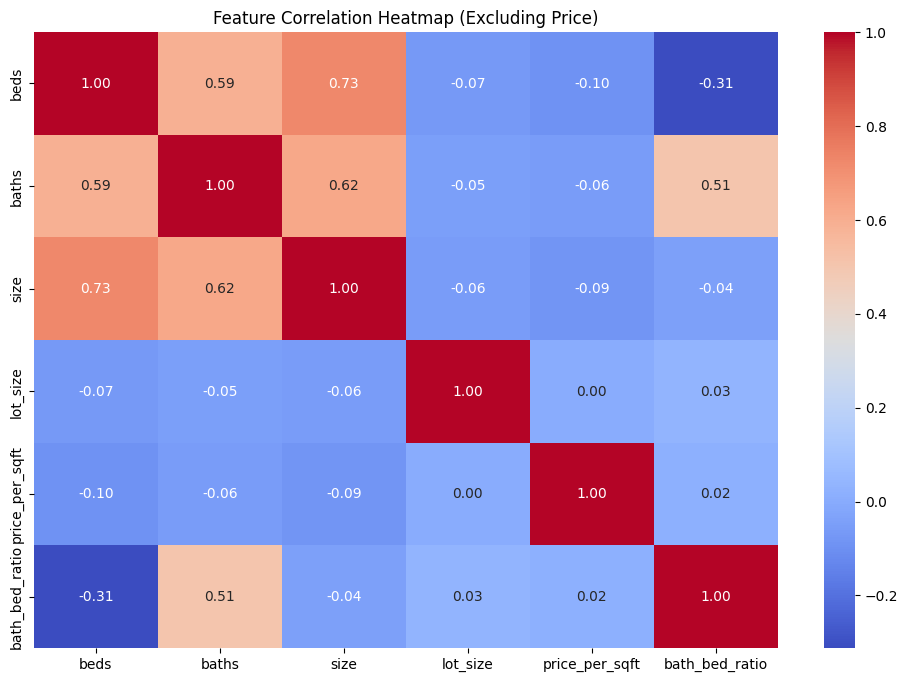

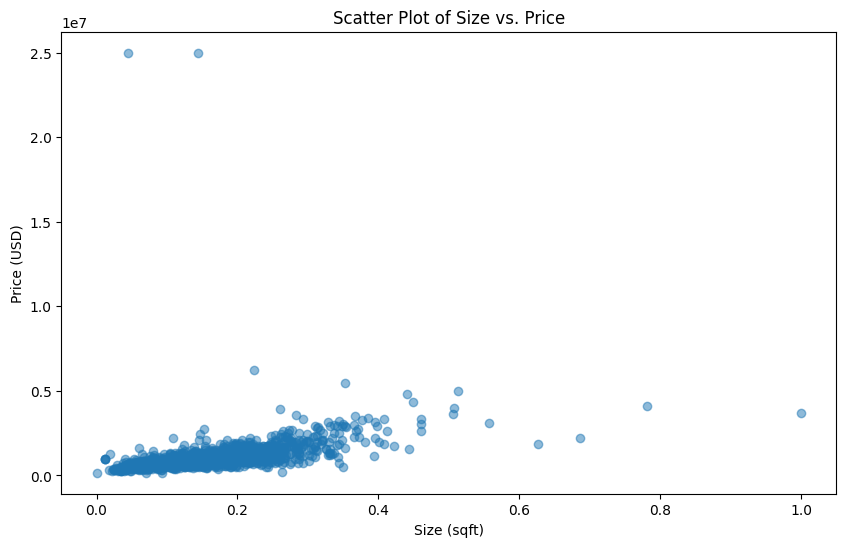

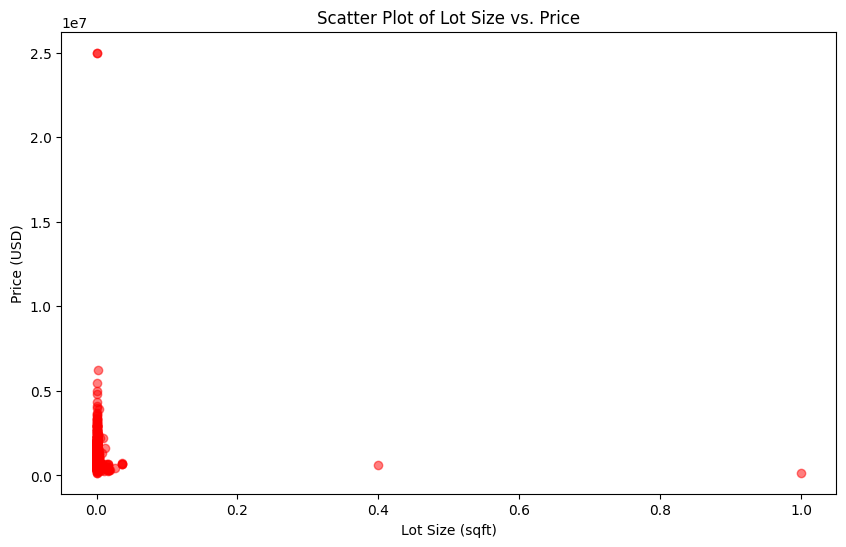

In [5]:
# Price distribution
plt.figure(figsize=(10,5))
plt.hist(train_df['price'], bins=50, edgecolor='black')
plt.xlabel('Price (Normalized)')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

# Feature correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(train_df.drop(columns=['price']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap (Excluding Price)')
plt.show()

# Scatter plot: Size vs Price
plt.figure(figsize=(10,6))
plt.scatter(train_df['size'], train_df['price'], alpha=0.5)
plt.xlabel('Size (sqft)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of Size vs. Price')
plt.show()

# Scatter plot: Lot Size vs Price
plt.figure(figsize=(10,6))
plt.scatter(train_df['lot_size'], train_df['price'], alpha=0.5, color='red')
plt.xlabel('Lot Size (sqft)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of Lot Size vs. Price')
plt.show()

# Cross Validation


Linear Regression Performance:
Mean R2 Score: 0.5017 (Std: 0.5378)
Mean MSE: 811899095180.2490 (Std: 1214143663725.8071)

Random Forest Performance:


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self

Mean R2 Score: 0.8023 (Std: 0.2968)
Mean MSE: 365142658756.6622 (Std: 621072624328.9082)


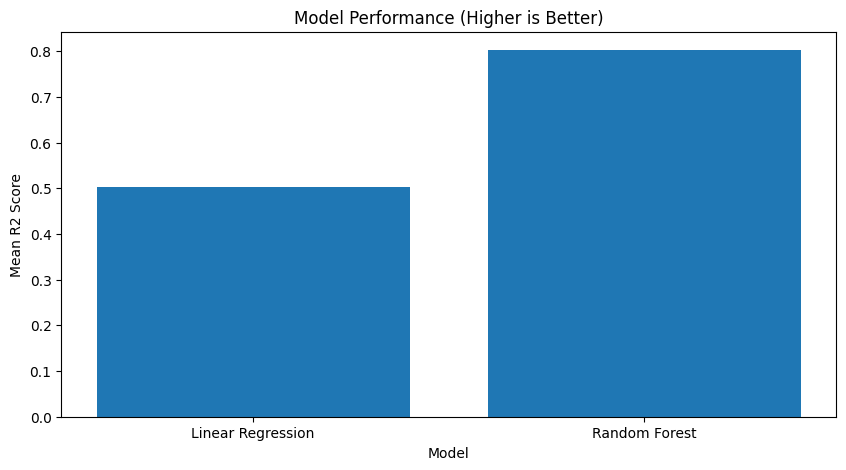

In [6]:
# Separate features and target
X = train_df.drop(columns=['price'])
y = train_df['price']

# Train models
lr = train_linear_regression(X, y)
rf = train_random_forest(X, y)

# Setup cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate Linear Regression
print("\nLinear Regression Performance:")
r2_lr, r2_std_lr, mse_lr, mse_std_lr = evaluate_model(lr, X, y, kf)
print(f"Mean R2 Score: {r2_lr:.4f} (Std: {r2_std_lr:.4f})")
print(f"Mean MSE: {mse_lr:.4f} (Std: {mse_std_lr:.4f})")

# Evaluate Random Forest
print("\nRandom Forest Performance:")
r2_rf, r2_std_rf, mse_rf, mse_std_rf = evaluate_model(rf, X, y, kf)
print(f"Mean R2 Score: {r2_rf:.4f} (Std: {r2_std_rf:.4f})")
print(f"Mean MSE: {mse_rf:.4f} (Std: {mse_std_rf:.4f})")

# Model comparison plot
models = ["Linear Regression", "Random Forest"]
r2_scores_list = [r2_lr, r2_rf]

plt.figure(figsize=(10,5))
plt.bar(models, r2_scores_list)
plt.xlabel("Model")
plt.ylabel("Mean R2 Score")
plt.title("Model Performance (Higher is Better)")
plt.show()